# CW1 - Object Recognition using CNN
To apply machine learning alorithms to clasify the testing images into object categories. Then use a model to perform classification and report quantitative results.

Due: Monday 19th April

# Introduction

The aim is to evaluate the use of CNN's in image recognition and the affect of adding multiple layers.

# Imports 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.feature
import tensorflow as tf
from sklearn.utils import shuffle
from numpy import load
from numpy import asarray
from numpy import save

# Load Data
There are 100 different categories of objects
each has 500 images for training and 100 images for testing.
Split the data into train and test sections

In [2]:
images = np.load('trnImage.npy')
label_fine = np.load('trnLabel_fine.npy')
label_coarse = np.load('trnLabel_coarse.npy')

#image_index = 1 # pick a specific image
#image = images[:, :, :, image_index]

test_images = np.load('tstImage.npy')
test_label_fine = np.load('tstLabel_fine.npy')
test_label_coarse = np.load('tstLabel_coarse.npy')

print(f'Images Shape: {images.shape}')
print(f'Train Labels Fine Shape: {label_fine.shape}')
print(f'Train Labels Coarse Shape: {label_coarse.shape}')

Images Shape: (32, 32, 3, 50000)
Train Labels Fine Shape: (50000,)
Train Labels Coarse Shape: (50000,)


# Shuffle data to ensure not ordered

In [3]:
images = shuffle(images, random_state=0)
label_fine, label_coarse = shuffle(label_fine, label_coarse, random_state=0) #make sure the samples are not ordered


test_images = shuffle(test_images, random_state=0)
test_label_fine, test_label_coarse = shuffle(test_label_fine, test_label_coarse, random_state=0)

# CNN

In [8]:
#images_reshaped = np.transpose(images, (3, 0, 1, 2))[:, :, :, -1]
#images_reshaped = np.expand_dims(images_reshaped, axis=3)
#
#print(images_reshaped.shape)
#print(images.shape)

(50000, 32, 32, 1)
(32, 32, 3, 50000)


In [5]:
#test_images_reshaped = np.transpose(test_images, (3, 0, 1, 2))[:, :, :, -1]
#test_images_reshaped = np.expand_dims(test_images_reshaped, axis=3)

#print(test_images_reshaped.shape)

(10000, 32, 32, 1)


# Normalise the data, for each image do a hog, add how to array, train images

In [14]:

train_images_normalised = []

try:
    data = load('hog_array_train.npy')
    print(data)
except FileNotFoundError: 
    
    for image_index in range(0, 100):
        image = images[:, :, :, image_index]

        # Extract features from a single image
        _, hog_image = skimage.feature.hog(image, pixels_per_cell=[2,2], cells_per_block=[3,3], visualize=True)
        train_images_normalised.append(hog_image)
        
    train_images_output = np.array(train_images_normalised)
    data = asarray(train_images_output)
        # save to npy file
    save('hog_array_train.npy', data)
    

[[[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.08066551 0.         ... 0.07596749 0.         0.035688  ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  ...
  [0.         0.48484196 0.         ... 0.66989446 0.         0.47573972]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.35944528 0.         ... 0.09321178 0.         0.07511319]]

 [[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.02941176 0.         ... 0.00588235 0.         0.00196078]
  [0.         0.         0.         ... 0.         0.         0.        ]
  ...
  [0.         0.24314974 0.         ... 0.11181117 0.         0.02670203]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.21667916 0.         ... 0.11573235 0.         0.06372549]]

 [[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.188247

normalise test data

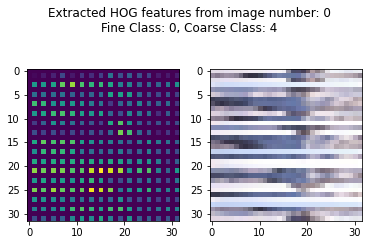

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01393245 0.         ... 0.04679743 0.         0.05200977]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.28317492 0.         ... 0.29926456 0.         0.28379184]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.15561402 0.         ... 0.17142342 0.         0.16775164]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01393245 0.         ... 0.04679743 0.         0.05200977]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.28317492 0.         ... 0.29926456 0.         0.28379184]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.15561402 0.         ... 0.17142342 0.         0.16775164]]


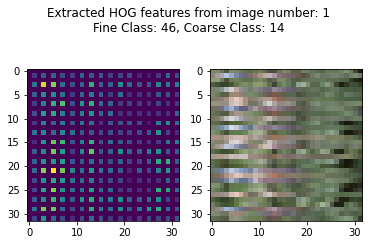

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.09737307 0.         ... 0.19000009 0.         0.12680937]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.21876742 0.         ... 0.20340695 0.         0.14959455]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.11004421 0.         ... 0.1229262  0.         0.14708605]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.09737307 0.         ... 0.19000009 0.         0.12680937]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.21876742 0.         ... 0.20340695 0.         0.14959455]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.11004421 0.         ... 0.1229262  0.         0.14708605]]


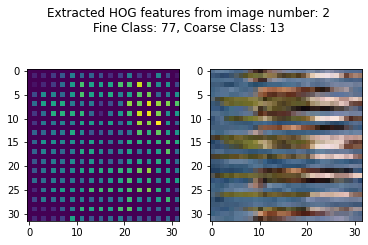

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0543244  0.         ... 0.14179765 0.         0.03303118]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.07195437 0.         ... 0.22392852 0.         0.13703265]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06934523 0.         ... 0.19768481 0.         0.14631652]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0543244  0.         ... 0.14179765 0.         0.03303118]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.07195437 0.         ... 0.22392852 0.         0.13703265]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06934523 0.         ... 0.19768481 0.         0.14631652]]


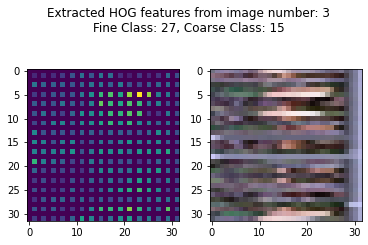

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.07826241 0.         ... 0.23843714 0.         0.17361652]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.18972947 0.         ... 0.52852944 0.         0.16891162]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.12882408 0.         ... 0.26809528 0.         0.16785941]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.07826241 0.         ... 0.23843714 0.         0.17361652]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.18972947 0.         ... 0.52852944 0.         0.16891162]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.12882408 0.         ... 0.26809528 0.         0.16785941]]


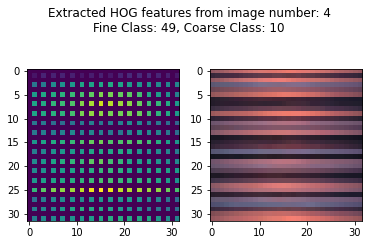

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02651506 0.         ... 0.04267612 0.         0.03059466]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.19753744 0.         ... 0.17596245 0.         0.16493363]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.1939013  0.         ... 0.22470067 0.         0.20854652]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02651506 0.         ... 0.04267612 0.         0.03059466]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.19753744 0.         ... 0.17596245 0.         0.16493363]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.1939013  0.         ... 0.22470067 0.         0.20854652]]


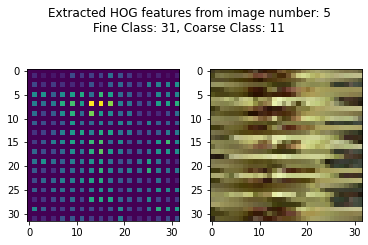

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.07949819 0.         ... 0.03137255 0.         0.05466967]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.33734967 0.         ... 0.37847579 0.         0.39903998]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.07824534 0.         ... 0.15616186 0.         0.18436819]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.07949819 0.         ... 0.03137255 0.         0.05466967]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.33734967 0.         ... 0.37847579 0.         0.39903998]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.07824534 0.         ... 0.15616186 0.         0.18436819]]


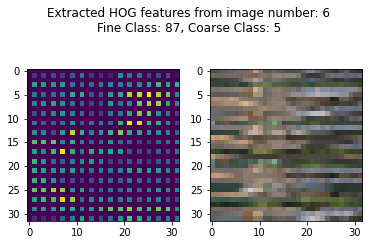

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06878457 0.         ... 0.11845627 0.         0.0230119 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.23553015 0.         ... 0.35836244 0.         0.23805885]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.05819674 0.         ... 0.19467688 0.         0.1870227 ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06878457 0.         ... 0.11845627 0.         0.0230119 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.23553015 0.         ... 0.35836244 0.         0.23805885]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.05819674 0.         ... 0.19467688 0.         0.1870227 ]]


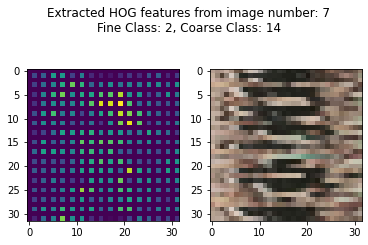

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.14073111 0.         ... 0.07554315 0.         0.11552732]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.20563984 0.         ... 0.25506498 0.         0.26289663]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06619765 0.         ... 0.13710653 0.         0.09450112]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.14073111 0.         ... 0.07554315 0.         0.11552732]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.20563984 0.         ... 0.25506498 0.         0.26289663]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06619765 0.         ... 0.13710653 0.         0.09450112]]


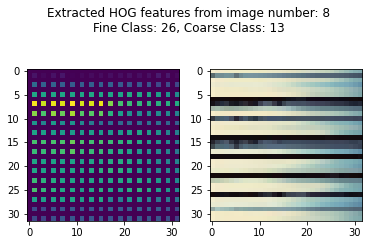

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04216976 0.         ... 0.05600442 0.         0.02058824]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.18761582 0.         ... 0.2066116  0.         0.17992236]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.1697152  0.         ... 0.18691517 0.         0.14937954]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04216976 0.         ... 0.05600442 0.         0.02058824]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.18761582 0.         ... 0.2066116  0.         0.17992236]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.1697152  0.         ... 0.18691517 0.         0.14937954]]


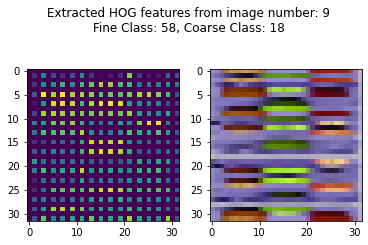

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.1019744  0.         ... 0.24021738 0.         0.19236077]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.20330736 0.         ... 0.25447148 0.         0.17108932]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.19110185 0.         ... 0.57583562 0.         0.17529681]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.1019744  0.         ... 0.24021738 0.         0.19236077]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.20330736 0.         ... 0.25447148 0.         0.17108932]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.19110185 0.         ... 0.57583562 0.         0.17529681]]


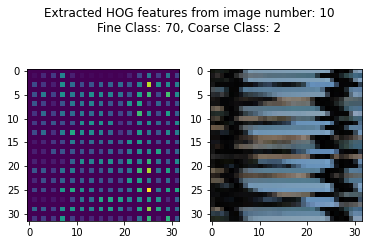

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02553909 0.         ... 0.32585203 0.         0.16766521]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.28157821 0.         ... 0.34519923 0.         0.28815341]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.13245091 0.         ... 0.53656441 0.         0.24149735]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02553909 0.         ... 0.32585203 0.         0.16766521]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.28157821 0.         ... 0.34519923 0.         0.28815341]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.13245091 0.         ... 0.53656441 0.         0.24149735]]


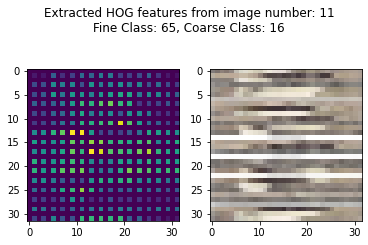

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03810585 0.         ... 0.03739706 0.         0.02610798]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.22450171 0.         ... 0.19035389 0.         0.19001921]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.11310457 0.         ... 0.03514685 0.         0.03827294]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03810585 0.         ... 0.03739706 0.         0.02610798]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.22450171 0.         ... 0.19035389 0.         0.19001921]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.11310457 0.         ... 0.03514685 0.         0.03827294]]


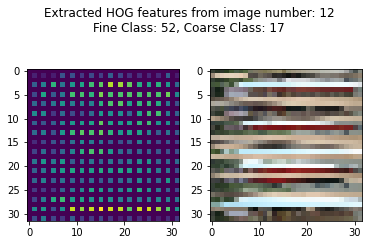

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.07941176 0.         ... 0.26907155 0.         0.06823354]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.4187178  0.         ... 0.64252484 0.         0.45000455]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.21037865 0.         ... 0.11285361 0.         0.14591254]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.07941176 0.         ... 0.26907155 0.         0.06823354]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.4187178  0.         ... 0.64252484 0.         0.45000455]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.21037865 0.         ... 0.11285361 0.         0.14591254]]


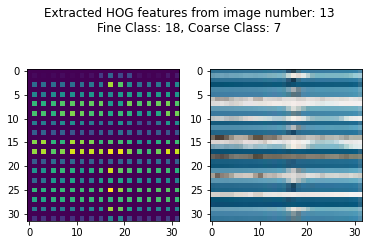

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01661203 0.         ... 0.04887768 0.         0.05033847]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.29123276 0.         ... 0.33144507 0.         0.31814998]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.10393099 0.         ... 0.12847305 0.         0.13465829]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01661203 0.         ... 0.04887768 0.         0.05033847]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.29123276 0.         ... 0.33144507 0.         0.31814998]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.10393099 0.         ... 0.12847305 0.         0.13465829]]


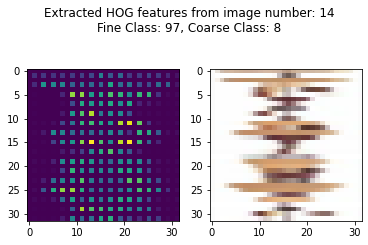

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.09141988 0.         ... 0.07843137 0.         0.03349243]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.00742793 0.         ... 0.0127451  0.         0.01036911]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00702184 0.         ... 0.01470588 0.         0.01176471]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.09141988 0.         ... 0.07843137 0.         0.03349243]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.00742793 0.         ... 0.0127451  0.         0.01036911]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00702184 0.         ... 0.01470588 0.         0.01176471]]


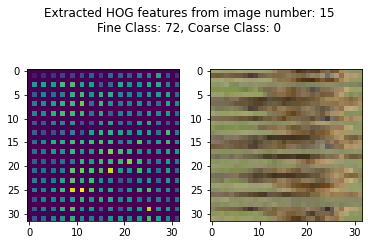

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01844142 0.         ... 0.07584788 0.         0.03956038]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.08680334 0.         ... 0.16921441 0.         0.10368301]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0818137  0.         ... 0.13544375 0.         0.05697866]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01844142 0.         ... 0.07584788 0.         0.03956038]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.08680334 0.         ... 0.16921441 0.         0.10368301]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0818137  0.         ... 0.13544375 0.         0.05697866]]


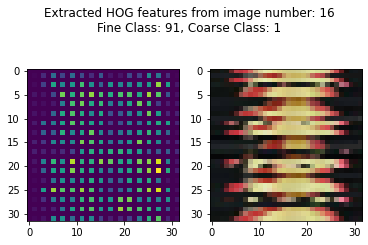

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01333878 0.         ... 0.11605707 0.         0.01176471]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.03812789 0.         ... 0.26756765 0.         0.02886328]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01674781 0.         ... 0.09020688 0.         0.0300201 ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01333878 0.         ... 0.11605707 0.         0.01176471]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.03812789 0.         ... 0.26756765 0.         0.02886328]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01674781 0.         ... 0.09020688 0.         0.0300201 ]]


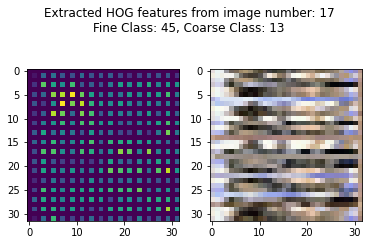

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04512525 0.         ... 0.22514129 0.         0.12457733]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.20678701 0.         ... 0.7179912  0.         0.42978493]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0512074  0.         ... 0.2662252  0.         0.24619184]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04512525 0.         ... 0.22514129 0.         0.12457733]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.20678701 0.         ... 0.7179912  0.         0.42978493]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0512074  0.         ... 0.2662252  0.         0.24619184]]


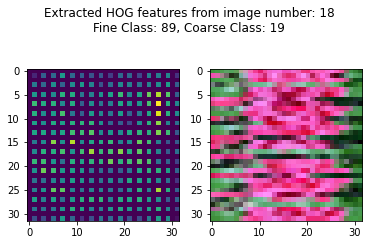

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.09902597 0.         ... 0.42405057 0.         0.13449915]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.36468847 0.         ... 0.41427481 0.         0.20218735]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.22474557 0.         ... 0.45100205 0.         0.04227903]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.09902597 0.         ... 0.42405057 0.         0.13449915]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.36468847 0.         ... 0.41427481 0.         0.20218735]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.22474557 0.         ... 0.45100205 0.         0.04227903]]


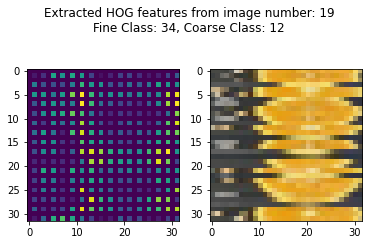

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04528005 0.         ... 0.1479761  0.         0.20604266]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.22273858 0.         ... 0.60888278 0.         0.62343611]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04877953 0.         ... 0.13364966 0.         0.17290435]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04528005 0.         ... 0.1479761  0.         0.20604266]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.22273858 0.         ... 0.60888278 0.         0.62343611]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04877953 0.         ... 0.13364966 0.         0.17290435]]


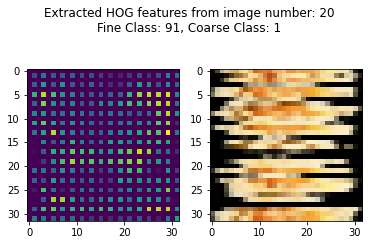

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.24614143 0.         ... 0.46179536 0.         0.36894175]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.31234386 0.         ... 0.95025337 0.         0.50823939]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.45375241 0.         ... 0.41023078 0.         0.60078213]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.24614143 0.         ... 0.46179536 0.         0.36894175]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.31234386 0.         ... 0.95025337 0.         0.50823939]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.45375241 0.         ... 0.41023078 0.         0.60078213]]


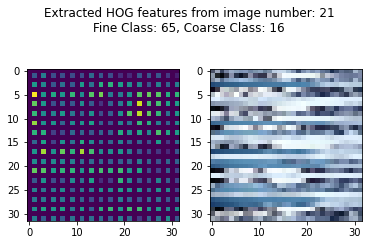

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.23001487 0.         ... 0.14669259 0.         0.06917748]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.40695992 0.         ... 0.36956323 0.         0.41253905]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.34850063 0.         ... 0.40221093 0.         0.23745848]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.23001487 0.         ... 0.14669259 0.         0.06917748]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.40695992 0.         ... 0.36956323 0.         0.41253905]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.34850063 0.         ... 0.40221093 0.         0.23745848]]


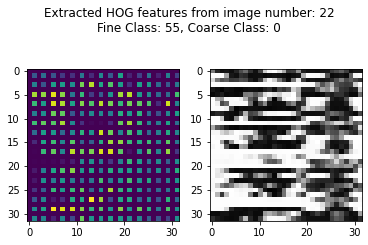

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.27649479 0.         ... 0.43439239 0.         0.19592387]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.47689485 0.         ... 0.71297126 0.         0.49755585]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.45595974 0.         ... 0.19498538 0.         0.49926369]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.27649479 0.         ... 0.43439239 0.         0.19592387]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.47689485 0.         ... 0.71297126 0.         0.49755585]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.45595974 0.         ... 0.19498538 0.         0.49926369]]


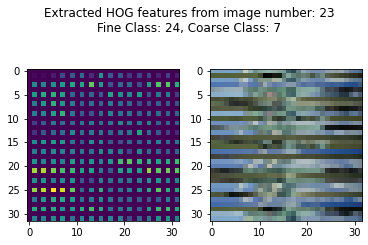

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0154002  0.         ... 0.12222988 0.         0.04675667]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.37944147 0.         ... 0.41851744 0.         0.36768821]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.27552149 0.         ... 0.32141355 0.         0.27936411]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0154002  0.         ... 0.12222988 0.         0.04675667]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.37944147 0.         ... 0.41851744 0.         0.36768821]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.27552149 0.         ... 0.32141355 0.         0.27936411]]


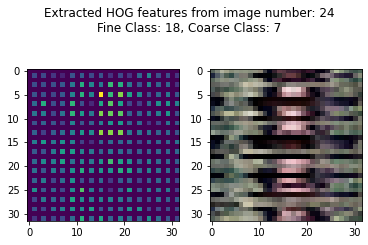

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.1824009  0.         ... 0.20002333 0.         0.1313555 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.22156102 0.         ... 0.20546589 0.         0.19004205]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.1299618  0.         ... 0.2221684  0.         0.1770014 ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.1824009  0.         ... 0.20002333 0.         0.1313555 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.22156102 0.         ... 0.20546589 0.         0.19004205]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.1299618  0.         ... 0.2221684  0.         0.1770014 ]]


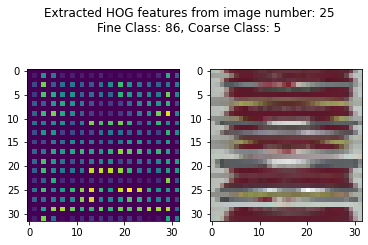

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04078659 0.         ... 0.36759041 0.         0.17887253]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.05494541 0.         ... 0.52114218 0.         0.19649987]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04622838 0.         ... 0.36091543 0.         0.2600876 ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04078659 0.         ... 0.36759041 0.         0.17887253]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.05494541 0.         ... 0.52114218 0.         0.19649987]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04622838 0.         ... 0.36091543 0.         0.2600876 ]]


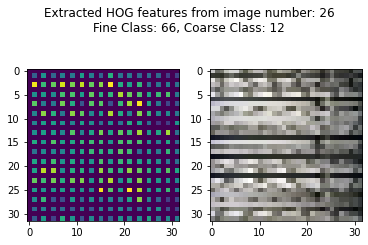

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.16441724 0.         ... 0.10718706 0.         0.1080545 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.18615791 0.         ... 0.13093276 0.         0.11001032]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.15136521 0.         ... 0.25308488 0.         0.22528952]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.16441724 0.         ... 0.10718706 0.         0.1080545 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.18615791 0.         ... 0.13093276 0.         0.11001032]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.15136521 0.         ... 0.25308488 0.         0.22528952]]


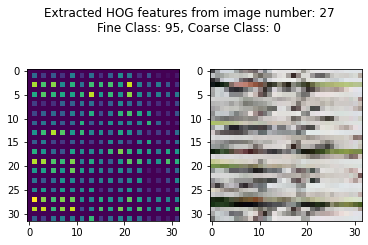

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.24972028 0.         ... 0.02434407 0.         0.04509804]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.6429435  0.         ... 0.36876762 0.         0.49562266]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.21196264 0.         ... 0.0462006  0.         0.11020674]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.24972028 0.         ... 0.02434407 0.         0.04509804]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.6429435  0.         ... 0.36876762 0.         0.49562266]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.21196264 0.         ... 0.0462006  0.         0.11020674]]


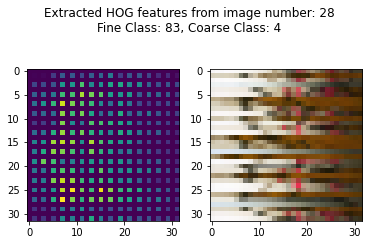

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00611379 0.         ... 0.08289198 0.         0.03000144]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.10226067 0.         ... 0.11837402 0.         0.11664215]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.09807841 0.         ... 0.14233124 0.         0.07274754]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00611379 0.         ... 0.08289198 0.         0.03000144]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.10226067 0.         ... 0.11837402 0.         0.11664215]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.09807841 0.         ... 0.14233124 0.         0.07274754]]


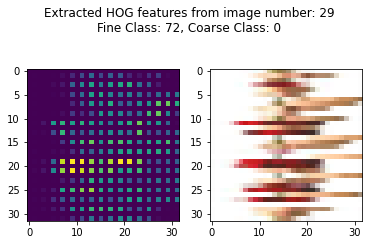

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00392157 0.         ... 0.01372549 0.         0.00490196]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.00588235 0.         ... 0.00980392 0.         0.00882353]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00392157 0.         ... 0.00392157 0.         0.00611379]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00392157 0.         ... 0.01372549 0.         0.00490196]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.00588235 0.         ... 0.00980392 0.         0.00882353]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00392157 0.         ... 0.00392157 0.         0.00611379]]


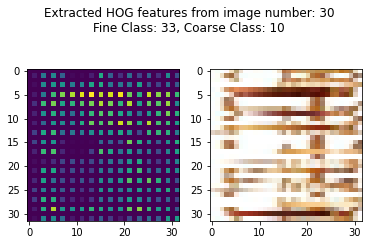

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06288252 0.         ... 0.42619353 0.         0.21650994]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.06862745 0.         ... 0.47953457 0.         0.25283618]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02454745 0.         ... 0.48169702 0.         0.49450988]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06288252 0.         ... 0.42619353 0.         0.21650994]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.06862745 0.         ... 0.47953457 0.         0.25283618]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02454745 0.         ... 0.48169702 0.         0.49450988]]


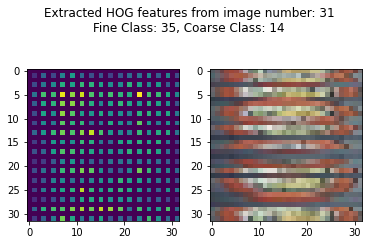

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06980343 0.         ... 0.23532366 0.         0.12090644]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.17187764 0.         ... 0.37200893 0.         0.17744131]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.08902125 0.         ... 0.17770017 0.         0.18137877]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06980343 0.         ... 0.23532366 0.         0.12090644]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.17187764 0.         ... 0.37200893 0.         0.17744131]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.08902125 0.         ... 0.17770017 0.         0.18137877]]


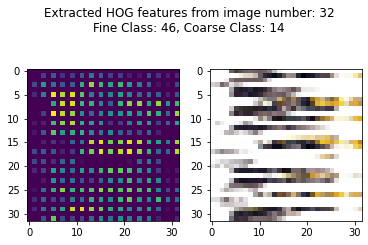

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00098039 0.         ... 0.08039215 0.         0.10980392]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.10149717 0.         ... 0.03529412 0.         0.14999999]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00294118 0.         ... 0.00686274 0.         0.0872549 ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00098039 0.         ... 0.08039215 0.         0.10980392]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.10149717 0.         ... 0.03529412 0.         0.14999999]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00294118 0.         ... 0.00686274 0.         0.0872549 ]]


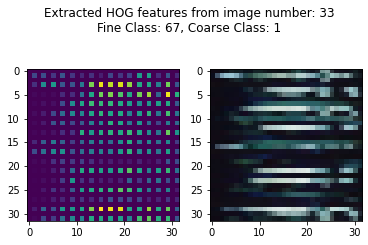

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.15392476 0.         ... 0.1912321  0.         0.08669531]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.05400414 0.         ... 0.55001114 0.         0.22426178]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01306329 0.         ... 0.48202667 0.         0.19701717]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.15392476 0.         ... 0.1912321  0.         0.08669531]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.05400414 0.         ... 0.55001114 0.         0.22426178]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01306329 0.         ... 0.48202667 0.         0.19701717]]


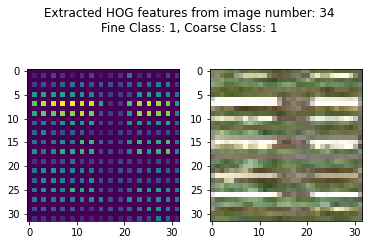

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06079962 0.         ... 0.16862284 0.         0.13023704]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.19342444 0.         ... 0.33112538 0.         0.22001855]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.09582221 0.         ... 0.23067345 0.         0.09306572]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06079962 0.         ... 0.16862284 0.         0.13023704]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.19342444 0.         ... 0.33112538 0.         0.22001855]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.09582221 0.         ... 0.23067345 0.         0.09306572]]


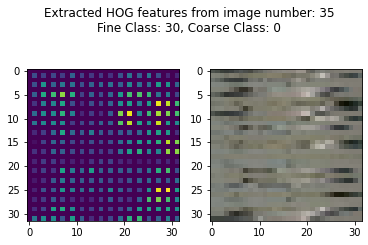

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.07734574 0.         ... 0.03830783 0.         0.0372549 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.04354094 0.         ... 0.19842575 0.         0.16607414]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.13039948 0.         ... 0.1409157  0.         0.10677078]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.07734574 0.         ... 0.03830783 0.         0.0372549 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.04354094 0.         ... 0.19842575 0.         0.16607414]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.13039948 0.         ... 0.1409157  0.         0.10677078]]


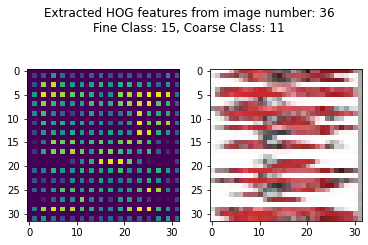

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.13627815 0.         ... 0.37693746 0.         0.23549084]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.3417654  0.         ... 0.41701514 0.         0.20877643]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.28432268 0.         ... 0.44305459 0.         0.28921847]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.13627815 0.         ... 0.37693746 0.         0.23549084]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.3417654  0.         ... 0.41701514 0.         0.20877643]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.28432268 0.         ... 0.44305459 0.         0.28921847]]


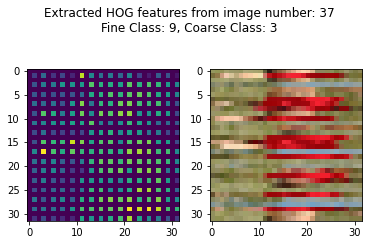

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.10018288 0.         ... 0.14566562 0.         0.03333333]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.19569591 0.         ... 0.39077955 0.         0.36471525]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.08392194 0.         ... 0.14479994 0.         0.09773415]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.10018288 0.         ... 0.14566562 0.         0.03333333]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.19569591 0.         ... 0.39077955 0.         0.36471525]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.08392194 0.         ... 0.14479994 0.         0.09773415]]


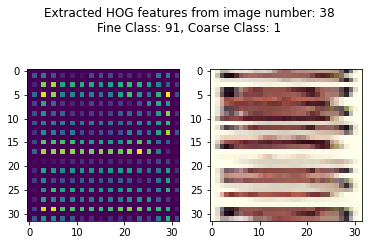

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.24915525 0.         ... 0.38444456 0.         0.16693659]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.17983344 0.         ... 0.56756486 0.         0.07745098]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.24841182 0.         ... 0.58358001 0.         0.1990196 ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.24915525 0.         ... 0.38444456 0.         0.16693659]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.17983344 0.         ... 0.56756486 0.         0.07745098]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.24841182 0.         ... 0.58358001 0.         0.1990196 ]]


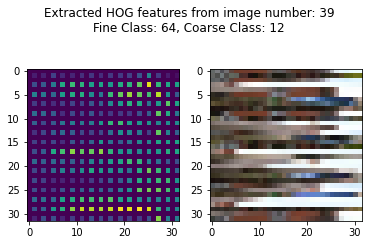

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06828965 0.         ... 0.06757433 0.         0.03539703]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.23513686 0.         ... 0.4168493  0.         0.40715398]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0872949  0.         ... 0.37559094 0.         0.3745098 ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06828965 0.         ... 0.06757433 0.         0.03539703]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.23513686 0.         ... 0.4168493  0.         0.40715398]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0872949  0.         ... 0.37559094 0.         0.3745098 ]]


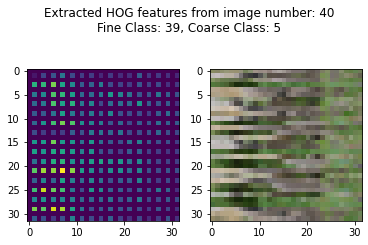

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03532909 0.         ... 0.08007697 0.         0.06397745]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.45508385 0.         ... 0.12041013 0.         0.08349006]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.16911057 0.         ... 0.14492351 0.         0.08056127]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03532909 0.         ... 0.08007697 0.         0.06397745]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.45508385 0.         ... 0.12041013 0.         0.08349006]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.16911057 0.         ... 0.14492351 0.         0.08056127]]


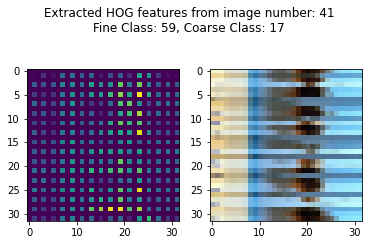

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01420278 0.         ... 0.02654026 0.         0.01633025]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.20174336 0.         ... 0.2616871  0.         0.27683526]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.14741828 0.         ... 0.12417527 0.         0.12356263]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01420278 0.         ... 0.02654026 0.         0.01633025]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.20174336 0.         ... 0.2616871  0.         0.27683526]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.14741828 0.         ... 0.12417527 0.         0.12356263]]


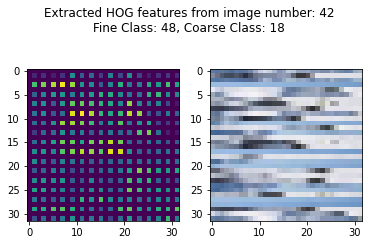

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06005338 0.         ... 0.09832813 0.         0.07160941]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.34621151 0.         ... 0.37265056 0.         0.43338022]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.14314371 0.         ... 0.3873915  0.         0.24921633]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06005338 0.         ... 0.09832813 0.         0.07160941]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.34621151 0.         ... 0.37265056 0.         0.43338022]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.14314371 0.         ... 0.3873915  0.         0.24921633]]


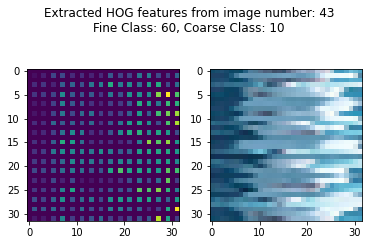

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0246305  0.         ... 0.12438047 0.         0.20246822]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.18444453 0.         ... 0.37947167 0.         0.63893564]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04221116 0.         ... 0.37327302 0.         0.12456426]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0246305  0.         ... 0.12438047 0.         0.20246822]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.18444453 0.         ... 0.37947167 0.         0.63893564]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04221116 0.         ... 0.37327302 0.         0.12456426]]


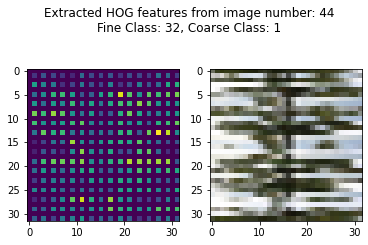

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.12161888 0.         ... 0.27806024 0.         0.14530348]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.25845369 0.         ... 0.55289549 0.         0.56496088]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.2435288  0.         ... 0.33081266 0.         0.22306205]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.12161888 0.         ... 0.27806024 0.         0.14530348]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.25845369 0.         ... 0.55289549 0.         0.56496088]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.2435288  0.         ... 0.33081266 0.         0.22306205]]


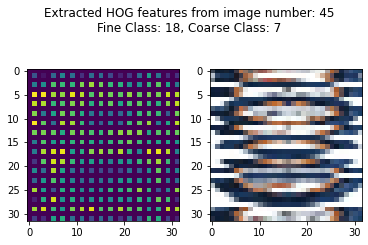

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.246091   0.         ... 0.13236154 0.         0.13832239]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.80440344 0.         ... 0.86048752 0.         0.82429314]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.17647059 0.         ... 0.19551739 0.         0.09676293]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.246091   0.         ... 0.13236154 0.         0.13832239]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.80440344 0.         ... 0.86048752 0.         0.82429314]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.17647059 0.         ... 0.19551739 0.         0.09676293]]


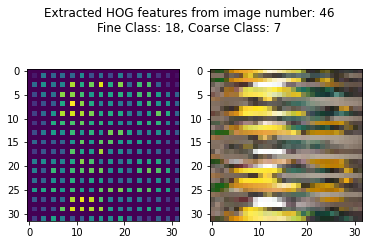

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04552971 0.         ... 0.10065808 0.         0.02761326]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.10550498 0.         ... 0.14167124 0.         0.14124697]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.13439416 0.         ... 0.1731023  0.         0.15516879]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04552971 0.         ... 0.10065808 0.         0.02761326]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.10550498 0.         ... 0.14167124 0.         0.14124697]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.13439416 0.         ... 0.1731023  0.         0.15516879]]


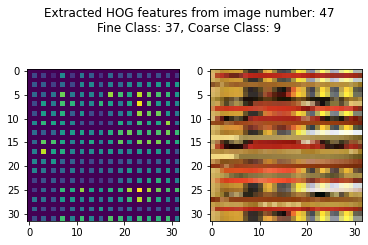

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.17457107 0.         ... 0.1830966  0.         0.12607893]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.26491471 0.         ... 0.22825806 0.         0.26808767]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.18708408 0.         ... 0.55598225 0.         0.35484447]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.17457107 0.         ... 0.1830966  0.         0.12607893]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.26491471 0.         ... 0.22825806 0.         0.26808767]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.18708408 0.         ... 0.55598225 0.         0.35484447]]


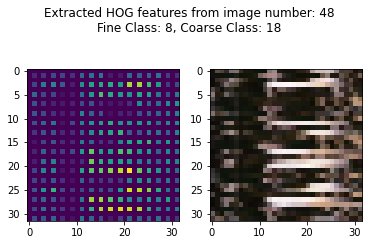

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.10033879 0.         ... 0.16121657 0.         0.12501717]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.18103747 0.         ... 0.3550433  0.         0.35999044]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.20553281 0.         ... 0.20104595 0.         0.12956532]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.10033879 0.         ... 0.16121657 0.         0.12501717]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.18103747 0.         ... 0.3550433  0.         0.35999044]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.20553281 0.         ... 0.20104595 0.         0.12956532]]


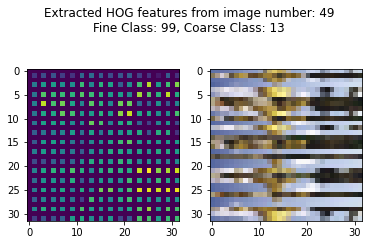

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.13138902 0.         ... 0.23925864 0.         0.11669388]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.37284237 0.         ... 0.59952881 0.         0.57566386]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.15376863 0.         ... 0.54854919 0.         0.56460461]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.13138902 0.         ... 0.23925864 0.         0.11669388]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.37284237 0.         ... 0.59952881 0.         0.57566386]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.15376863 0.         ... 0.54854919 0.         0.56460461]]


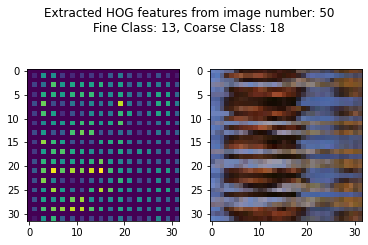

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06587259 0.         ... 0.10623061 0.         0.04661177]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.1463382  0.         ... 0.2441999  0.         0.16206063]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03746341 0.         ... 0.17102005 0.         0.09724083]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06587259 0.         ... 0.10623061 0.         0.04661177]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.1463382  0.         ... 0.2441999  0.         0.16206063]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03746341 0.         ... 0.17102005 0.         0.09724083]]


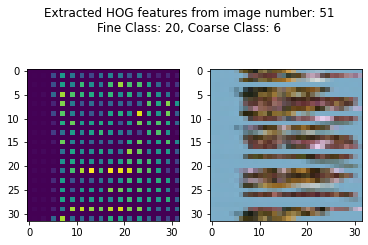

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00294118 0.         ... 0.072584   0.         0.03432858]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.01176471 0.         ... 0.2491658  0.         0.22751779]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00490196 0.         ... 0.13529411 0.         0.14019608]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00294118 0.         ... 0.072584   0.         0.03432858]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.01176471 0.         ... 0.2491658  0.         0.22751779]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00490196 0.         ... 0.13529411 0.         0.14019608]]


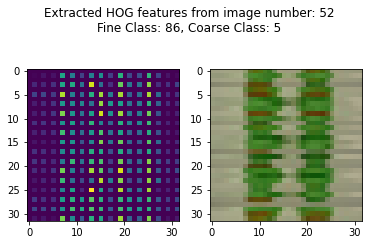

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00628844 0.         ... 0.0239478  0.         0.01085399]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.09273764 0.         ... 0.08718129 0.         0.10390268]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02455058 0.         ... 0.0216907  0.         0.02957404]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00628844 0.         ... 0.0239478  0.         0.01085399]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.09273764 0.         ... 0.08718129 0.         0.10390268]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02455058 0.         ... 0.0216907  0.         0.02957404]]


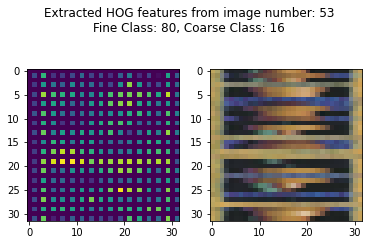

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.13267542 0.         ... 0.33356404 0.         0.17453997]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.13122254 0.         ... 0.33698254 0.         0.15108659]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.1455532  0.         ... 0.46838216 0.         0.20291865]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.13267542 0.         ... 0.33356404 0.         0.17453997]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.13122254 0.         ... 0.33698254 0.         0.15108659]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.1455532  0.         ... 0.46838216 0.         0.20291865]]


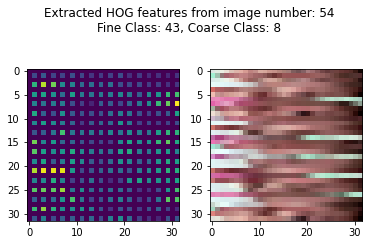

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.14219332 0.         ... 0.07491345 0.         0.09630544]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.43559027 0.         ... 0.13042679 0.         0.08016563]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.17504105 0.         ... 0.15980153 0.         0.17126921]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.14219332 0.         ... 0.07491345 0.         0.09630544]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.43559027 0.         ... 0.13042679 0.         0.08016563]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.17504105 0.         ... 0.15980153 0.         0.17126921]]


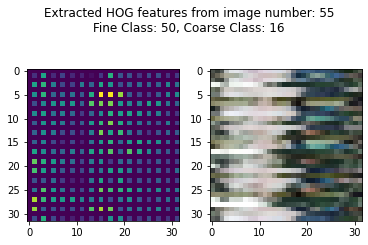

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.09961844 0.         ... 0.1089824  0.         0.12058824]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.59622931 0.         ... 0.17108487 0.         0.2339372 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.16820909 0.         ... 0.10770696 0.         0.14107233]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.09961844 0.         ... 0.1089824  0.         0.12058824]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.59622931 0.         ... 0.17108487 0.         0.2339372 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.16820909 0.         ... 0.10770696 0.         0.14107233]]


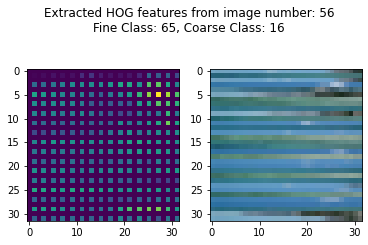

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00611379 0.         ... 0.14063364 0.         0.10109336]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.23972134 0.         ... 0.30013365 0.         0.23727065]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.13823529 0.         ... 0.17278275 0.         0.16561529]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00611379 0.         ... 0.14063364 0.         0.10109336]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.23972134 0.         ... 0.30013365 0.         0.23727065]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.13823529 0.         ... 0.17278275 0.         0.16561529]]


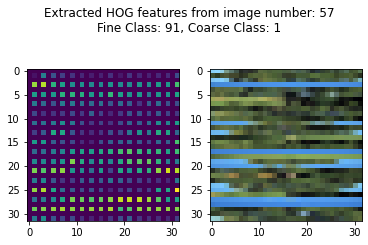

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04215686 0.         ... 0.10247355 0.         0.19617479]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.64462566 0.         ... 0.69589269 0.         0.67827243]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.34737132 0.         ... 0.09223518 0.         0.15874721]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04215686 0.         ... 0.10247355 0.         0.19617479]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.64462566 0.         ... 0.69589269 0.         0.67827243]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.34737132 0.         ... 0.09223518 0.         0.15874721]]


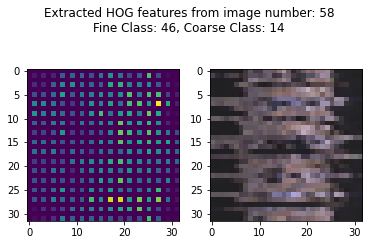

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03137255 0.         ... 0.01470588 0.         0.0051334 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.01770136 0.         ... 0.04033492 0.         0.01959874]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01494727 0.         ... 0.01078431 0.         0.00784314]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03137255 0.         ... 0.01470588 0.         0.0051334 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.01770136 0.         ... 0.04033492 0.         0.01959874]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01494727 0.         ... 0.01078431 0.         0.00784314]]


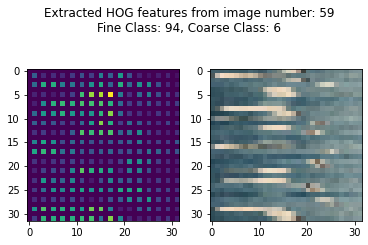

In [ ]:

test_images_normalised = []

try:
    data = load('hog_array_test.npy')
    print(data)
except: 
    for image_index in range(0, 100):
        image = test_images[:, :, :, image_index]

        # Extract features from a single image
        _, hog_image = skimage.feature.hog(image, pixels_per_cell=[2,2], cells_per_block=[3,3], visualize=True)
        test_images_normalised.append(hog_image)


    train_images_output = np.array(test_images_normalised)
    data = asarray(train_images_output)
    save('hog_array_test.npy', data)

In [ ]:
print(test_images_normalised)

Normalise the data, for each image do a hog, add how to array


In [ ]:
print(train_images_normalised)

### Create and train a Tensorflow Convolutional Neural Network on the training set using Conv2D and pooling Layers

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, -1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.summary()

Check the Data cardinality

In [ ]:
print(test_images_normalised.shape)

In [ ]:
print(train_images_normalised.shape)
print(test_images_normalised.shape)

#train_images_normalised = np.array(train_images_normalised).reshape(50000, -1, 32, 32)
#test_images_normalised = np.array(test_images_normalised).reshape(10000, -1, 32, 32)

#train_images_normalised = train_images_normalised[:, 0, :, :]
test_images_normalised = test_images_normalised[:, 0, :, :]

train_images_normalised = np.transpose(train_images_normalised, (1, 2, 0))
test_images_normalised = np.transpose(test_images_normalised, (1, 2, 0))

print(train_images_normalised.shape)
print(test_images_normalised.shape)


print(label_fine.shape)
print(test_label_fine.shape)

In [ ]:
#check number of unique  labels in coarse dtaaset
#number of labels

output_num_fine = (np.unique(label_fine).shape[0])
print(output_num_fine)

output_num_coarse = (np.unique(label_coarse).shape[0])
print(output_num_coarse)

In [ ]:
xTrn, xTst, yTrn, yTst = train_test_split(train_images_normalised, label_coarse, test_size=0.2)

In [ ]:
model.add(tf.keras.layers.Flatten()) #dense layers can oinly have 1d so flattern araray to one dimension
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(output_num_coarse, activation='softmax'))

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(xTrn, yTrn, epochs=10, 
                    validation_data=(xTst, yTst))

### Plot models traing curves 

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(images_normalised,  label_fine_normalised, verbose=2)

print(test_acc)

In [ ]:
score = model.evaluate(test_images_normalised, test_label_fine_normalised, verbose=0)
print(score)